In [37]:
%pip install tensorflow==2.9.0
%pip install ampligraph
%pip install networkx
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

## Dataset


In [39]:
df = pd.read_csv("dinosaurs.csv", encoding='cp1251', sep=';')
df.head()

,Динозавр,Отряд,Семейство,Эпоха,Таз
0,dinosaurus#Acheroraptor,dinosaurus#Тероподы,dinosaurus#Дромеозавриды,dinosaurus#Ранний_мел,dinosaurus#Ящеротазовый
1,dinosaurus#Acrotholus,dinosaurus#Пахецелозавры,dinosaurus#Пахицефалозавриды,dinosaurus#Верхний_мел,dinosaurus#Птицетозовый
2,dinosaurus#Adelolophus,dinosaurus#Орнитоподы,dinosaurus#Гадрозавриды,dinosaurus#Верхний_мел,dinosaurus#Птицетозовый
3,dinosaurus#Adeopapposaurus,dinosaurus#Завроподоморфы,dinosaurus#Завроподоморфы,dinosaurus#Ранний_мел,dinosaurus#Птицетозовый
4,dinosaurus#Agujaceratops,dinosaurus#Цератопсы,dinosaurus#Цератопсиды,dinosaurus#Верхний_мел,dinosaurus#Птицетозовый


In [40]:
df.describe()

,Динозавр,Отряд,Семейство,Эпоха,Таз
count,388,376,308,364,380
unique,387,10,24,4,2
top,dinosaurus#Тиран1нозавр,dinosaurus#Тероподы,dinosaurus#Гадрозавриды,dinosaurus#Верхний_мел,dinosaurus#Ящеротазовый
freq,2,160,52,304,192


Все значения ненулевые

In [72]:
df["train"] = df["Таз"] == "dinosaurus#Птицетозовый"

In [42]:
train_counts = df["train"].value_counts()

print(train_counts)

train
False    200
True     188
Name: count, dtype: int64


## Создание графа знаний

In [45]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("dinosaurs.csv", encoding='cp1251', sep=';')

triples = []

for i, row in df.iterrows():
    # Создаем триплеты для динозавров
    dinosaur_name = row["Динозавр"]

    # Ограничиваем генерирование триплетов только когда значения не пустые
    if pd.notna(row["Отряд"]):
        order = (dinosaur_name, "belongsToOrder", row["Отряд"])
        triples.append(order)
    if pd.notna(row["Семейство"]):
        family = (dinosaur_name, "belongsToFamily", row["Семейство"])
        triples.append(family)
    if pd.notna(row["Эпоха"]):
        era = (dinosaur_name, "livedInEra", row["Эпоха"])
        triples.append(era)
    if pd.notna(row["Таз"]):
        pelvis_type = (dinosaur_name, "hasPelvisType", row["Таз"])
        triples.append(pelvis_type)

# Пример вывода нескольких триплетов
for triple in triples[:10]:
    print(triple)

('dinosaurus#Acheroraptor', 'belongsToOrder', 'dinosaurus#Тероподы')
('dinosaurus#Acheroraptor', 'belongsToFamily', 'dinosaurus#Дромеозавриды')
('dinosaurus#Acheroraptor', 'livedInEra', 'dinosaurus#Ранний_мел')
('dinosaurus#Acheroraptor', 'hasPelvisType', 'dinosaurus#Ящеротазовый')
('dinosaurus#Acrotholus', 'belongsToOrder', 'dinosaurus#Пахецелозавры')
('dinosaurus#Acrotholus', 'belongsToFamily', 'dinosaurus#Пахицефалозавриды')
('dinosaurus#Acrotholus', 'livedInEra', 'dinosaurus#Верхний_мел')
('dinosaurus#Acrotholus', 'hasPelvisType', 'dinosaurus#Птицетозовый')
('dinosaurus#Adelolophus', 'belongsToOrder', 'dinosaurus#Орнитоподы')
('dinosaurus#Adelolophus', 'belongsToFamily', 'dinosaurus#Гадрозавриды')


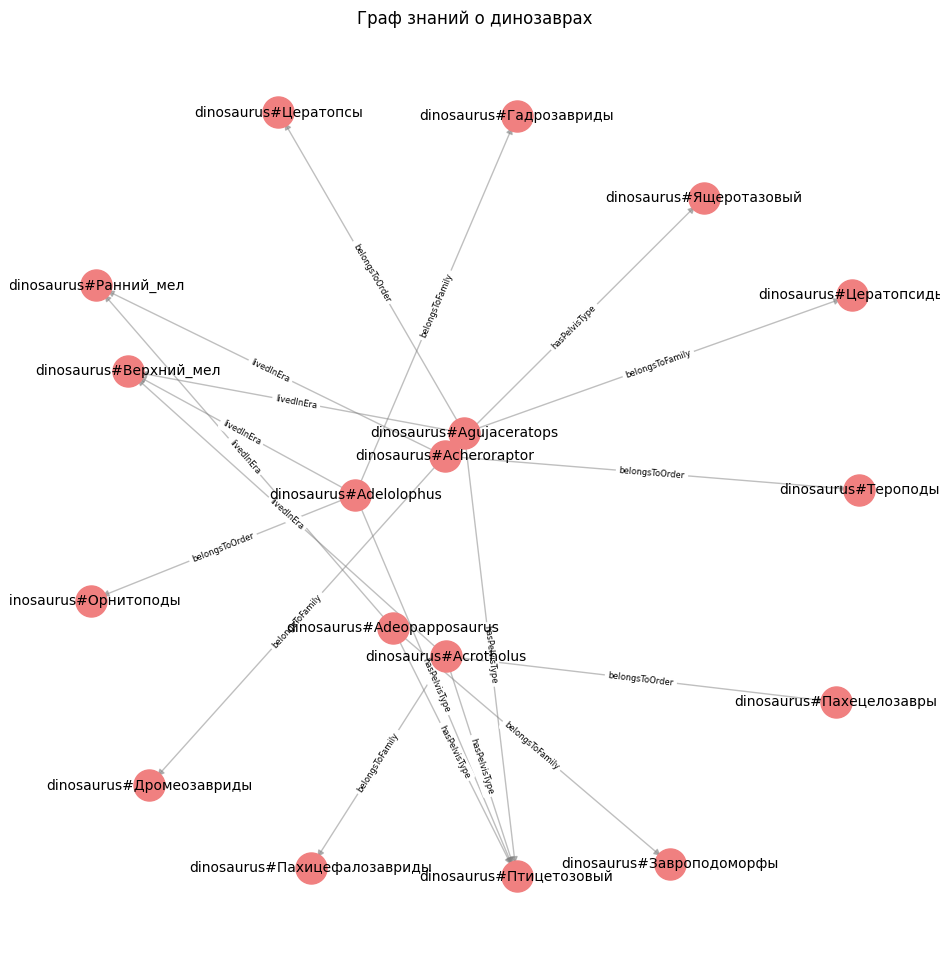

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Инициализируем направленный граф
G = nx.DiGraph()

# Ограничение на количество триплетов для визуализации
max_triples = 20

# Добавляем узлы и ребра на основе триплетов
for i, triple in enumerate(triples):
    if i >= max_triples:
        break

    subject, predicate, object_ = triple

    # Добавляем узлы для субъекта и объекта, если они еще не в графе
    if subject not in G:
        G.add_node(subject)
    if object_ not in G:
        G.add_node(object_)

    # Добавляем ребро между субъектом и объектом с предикатом как меткой ребра
    G.add_edge(subject, object_, label=predicate)

# Определяем разметку для лучшей визуализации
pos = nx.spring_layout(G, seed=42)  # Расположение узлов с использованием пружинной разметки

# Рисуем граф
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightcoral', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)}, font_size=6)

# Отображаем граф
plt.title("Граф знаний о динозаврах")
plt.axis("off")  # Скрыть оси
plt.show()


In [47]:
import pandas as pd

# Создаем DataFrame из списка триплетов
triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])

# Фильтруем DataFrame для получения только тех строк, где
# либо "subject" равно "dinosaurus#Acheroraptor",
# либо "object" равно "dinosaurus#Ящеротазовый"
filtered_triples = triples_df[(triples_df.subject == "dinosaurus#Acheroraptor") | (triples_df.object == "dinosaurus#Ящеротазовый")]

# Показать отфильтрованные данные
print(filtered_triples)


                         subject        predicate                    object
0        dinosaurus#Acheroraptor   belongsToOrder       dinosaurus#Тероподы
1        dinosaurus#Acheroraptor  belongsToFamily  dinosaurus#Дромеозавриды
2        dinosaurus#Acheroraptor       livedInEra     dinosaurus#Ранний_мел
3        dinosaurus#Acheroraptor    hasPelvisType   dinosaurus#Ящеротазовый
27      dinosaurus#Ganzhousaurus    hasPelvisType   dinosaurus#Ящеротазовый
...                          ...              ...                       ...
1394      dinosaurus#Тарбо13завр    hasPelvisType   dinosaurus#Ящеротазовый
1398     dinosaurus#Тиран1нозавр    hasPelvisType   dinosaurus#Ящеротазовый
1401   dinosaurus#Фукуи3в1енатор    hasPelvisType   dinosaurus#Ящеротазовый
1411   dinosaurus#Ценаг3н1атазия    hasPelvisType   dinosaurus#Ящеротазовый
1415  dinosaurus#Цяньч133жоузавр    hasPelvisType   dinosaurus#Ящеротазовый

[195 rows x 3 columns]


## Тренировка эмбедингов в графе знаний

In [48]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=1000)

In [49]:
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (428, 3)
Test set size:  (1000, 3)


In [52]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

# Создание модели
model = ScoringBasedEmbeddingModel(k=100000,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

# Определение оптимизатора, функции потерь и регуляризатора
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# Компиляция модели
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

In [53]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=20, # Number of training epochs
          verbose=True # Displays a progress bar.
          )

Epoch 1/20
55/55 [==============================] - 73s 1s/step - loss: 24.1309
Epoch 2/20
55/55 [==============================] - 63s 1s/step - loss: 24.1233
Epoch 3/20
55/55 [==============================] - 62s 1s/step - loss: 24.1043
Epoch 4/20
55/55 [==============================] - 61s 1s/step - loss: 24.0408
Epoch 5/20
55/55 [==============================] - 64s 1s/step - loss: 23.8438
Epoch 6/20
55/55 [==============================] - 63s 1s/step - loss: 23.3826
Epoch 7/20
55/55 [==============================] - 69s 1s/step - loss: 22.5637
Epoch 8/20
55/55 [==============================] - 78s 1s/step - loss: 21.4129
Epoch 9/20
55/55 [==============================] - 76s 1s/step - loss: 20.0915
Epoch 10/20
55/55 [==============================] - 83s 2s/step - loss: 18.8058
Epoch 11/20
55/55 [==============================] - 92s 2s/step - loss: 17.6183
Epoch 12/20
55/55 [==============================] - 86s 2s/step - loss: 16.5526
Epoch 13/20
55/55 [==================

## Проверка эмбедингов

Мы должны предпринять некоторые шаги, связанные с графом знаний, чтобы обеспечить корректное обучение и оценку нашей модели. Первый из них - это определение фильтра, который будет использоваться для обеспечения того, чтобы никакие отрицательные утверждения, сгенерированные в результате процедуры проверки, на самом деле не были положительными. Это можно сделать, просто объединив обучающие и тестовые наборы. Теперь, когда стратегия искажения генерирует отрицательные тройки, можно проверить, что они на самом деле не являются истинными утверждениями.

Для этого используем метод `evaluate` объекта model:

- **`X_valid`** - данные для оценки. Мы собираемся использовать тестовый набор для оценки.
- **`use_filter`** - будет отфильтровывать ложноотрицательные результаты, генерируемые стратегией коррупции.
- **`corrupt_side"** - определяет подход к тройной коррупции. параметр "s,o" означает значение "True", тогда subj и obj будут повреждены отдельно во время оценки.
- **"verbose"** - отображает индикатор выполнения.

In [54]:
# Оценка модели на валидационном наборе данных
ranks = model.evaluate(
    X_valid,
    use_filter={'train': X_train, 'test': X_valid},  # Фильтруем по тренировочным и валидационным триплетам
    corrupt_side='s,o',  # Указываем, что коррумпировать будем субъект и объект
    verbose=True  # Включаем вывод прогресса на экран
)

101/101 [==============================] - 209s 2s/step


Мы собираемся использовать функции mrr_score (среднее значение взаимного ранжирования) и hits_at_n_score.

- **mrr_score**: Функция вычисляет среднее значение взаимного значения элементов вектора рангов рейтинга.
- **hits_at_n_score**: Функция вычисляет, сколько элементов вектора рейтинговых рангов попадают на верхние n позиций.

In [56]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

# Вычисление среднего ранга (Mean Rank, MR)
mr = mr_score(ranks)

# Вычисление среднего обратного ранга (Mean Reciprocal Rank, MRR)
mrr = mrr_score(ranks)

# Вывод средного обратного ранга
print("MRR: %.2f" % mrr)

# Вывод среднего ранга
print("MR: %.2f" % mr)

# Вычисление метрики Hits@10 - процент случаев, в которых правильные ответы
# попадают в топ-10 предсказанных
hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % hits_10)

# Вычисление метрики Hits@3
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % hits_3)

# Вычисление метрики Hits@1
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % hits_1)

MRR: inf
MR: 183.86
Hits@10: 0.25
Hits@3: 0.19
Hits@1: 0.13


Самих по себе этих показателей недостаточно, чтобы сделать вывод о полезности встраиваний в последующую задачу, но они предполагают, что встраивания усвоили достаточно разумное представление, чтобы рассмотреть возможность их использования в большем количестве задач.

## Кластеризация и визуализация эмбедингов

Чтобы оценить субъективное качество вложений, мы можем визуализировать вложения в двумерном пространстве, а также сгруппировать их в исходном пространстве. Мы можем сравнить кластеризованные вложения с естественными кластерами, в данном случае с континентом, откуда родом команда, чтобы у нас была основа для оценки качества кластеризации как в качественном, так и в количественном отношении.

In [57]:
%pip install adjustText
%pip install seaborn
import pandas as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

In [135]:
family_to_order_map = dict(zip(df["Семейство"], df["Отряд"]))
print(df.columns)

# Функция для получения отряда по семейству
def map_family_to_order(family_name):
    return family_to_order_map.get(family_name, None)


Index(['Динозавр', 'Отряд', 'Семейство', 'Эпоха', 'Таз', 'train'], dtype='object')


Создаем словарь с эмбеддингами всех команд:


In [136]:
dinos = df["Семейство"][df["train"]].unique()

# Получение эмбеддингов для всех уникальных семейств
dino_embeddings = dict(zip(dinos, model.get_embeddings(dinos)))


1 triples containing invalid keys skipped! You can use `ScoringBasedEmbeddingModel.get_invalid_keys` or`DataIndexer.get_invalid_keys` to find out which keys are invalid.



Используем метод PCA для проекции эмбеддингов из 200-мерного пространства в 2D-пространство:


In [137]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array(list(dino_embeddings.values())))

Кластеризуем эмбеддинги команд в их оригинальном 200-мерном пространстве используя метод find_clusters из нашего Discovery API:


In [138]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(
    n_clusters=6,  
    n_init=50,     
    max_iter=500,  
    random_state=0 
)

# Кластеризация на основе эмбеддингов
clusters = clustering_algorithm.fit_predict(embeddings_2d)

DataFrame содержит для каждой команды их проецированные эмбеддинги в 2D-пространстве через PCA, их континент и кластер KMeans. Используем это вместе с Seaborn для создания визуализаций.


In [142]:
# Получение валидных семейств и их кластеров
valid_dinos = list(dino_embeddings.keys())
orders = pd.Series(valid_dinos).apply(map_family_to_order)

# Проверка длины переменных перед созданием DataFrame
print("Length of valid_dinos:", len(valid_dinos))
print("Shape of embeddings_2d:", embeddings_2d.shape)
print("Length of orders:", len(orders))
print("Length of clusters:", len(clusters))

# Создание DataFrame для визуализации
if len(valid_dinos) == embeddings_2d.shape[0] == len(orders) == len(clusters):
    plot_df = pd.DataFrame({
        "dinos": valid_dinos,
        "embedding1": embeddings_2d[:, 0],
        "embedding2": embeddings_2d[:, 1],
        "order": orders,
        "cluster": "cluster" + pd.Series(clusters).astype(str)
    })
    print(plot_df.head())
else:
    print("Error: Lengths of arrays do not match after filtering.")

Length of valid_dinos: 9
Shape of embeddings_2d: (9, 2)
Length of orders: 9
Length of clusters: 9
                          dinos  embedding1  embedding2  \
0  dinosaurus#Пахицефалозавриды    0.106946    1.508479   
1       dinosaurus#Гадрозавриды  -12.259686   -5.676867   
2     dinosaurus#Завроподоморфы    7.933110  -10.327991   
3        dinosaurus#Цератопсиды    1.180984    5.804509   
4        dinosaurus#Нодозавриды    0.597839    2.125510   

                        order   cluster  
0  dinosaurus#Пахицефалозавры  cluster5  
1       dinosaurus#Орнитоподы  cluster2  
2   dinosaurus#Завроподоморфы  cluster1  
3        dinosaurus#Цератопсы  cluster3  
4      dinosaurus#Анкилозавры  cluster0  


We plot the results on a 2D scatter plot, coloring the teams by the continent or cluster and also displaying some individual team names.

We always display the names of the top 20 teams (according to [FIFA rankings](https://en.wikipedia.org/wiki/FIFA_World_Rankings)) and a random subset of the rest.

Отображаем результаты на 2D-диаграмме рассеивания, раскрашивая команды по континентам или кластерам и выводим названия некоторых отдельных команд.

Отображаем названия топ-20 команд (согласно рейтингу FIFA) и случайный поднабор остальных.


['dinosaurus#Дромеозавриды', 'dinosaurus#Пахицефалозавриды', 'dinosaurus#Гадрозавриды', 'dinosaurus#Завроподоморфы', 'dinosaurus#Цератопсиды', 'dinosaurus#Овирапториды', 'dinosaurus#Нодозавриды', 'dinosaurus#Ceratosauridae', 'dinosaurus#Абелизавриды', nan, 'dinosaurus#Анкилозавриды', 'dinosaurus#Теризинозавриды', 'dinosaurus#Кархародонтозавриды', 'dinosaurus#Тираннозавриды', 'dinosaurus#Аллозавриды', 'dinosaurus#Тесцелозавриды', 'dinosaurus#Альваресзавриды', 'dinosaurus#Стегозавриды', 'dinosaurus#Брахиозавриды', 'dinosaurus#Iguanodontidae']


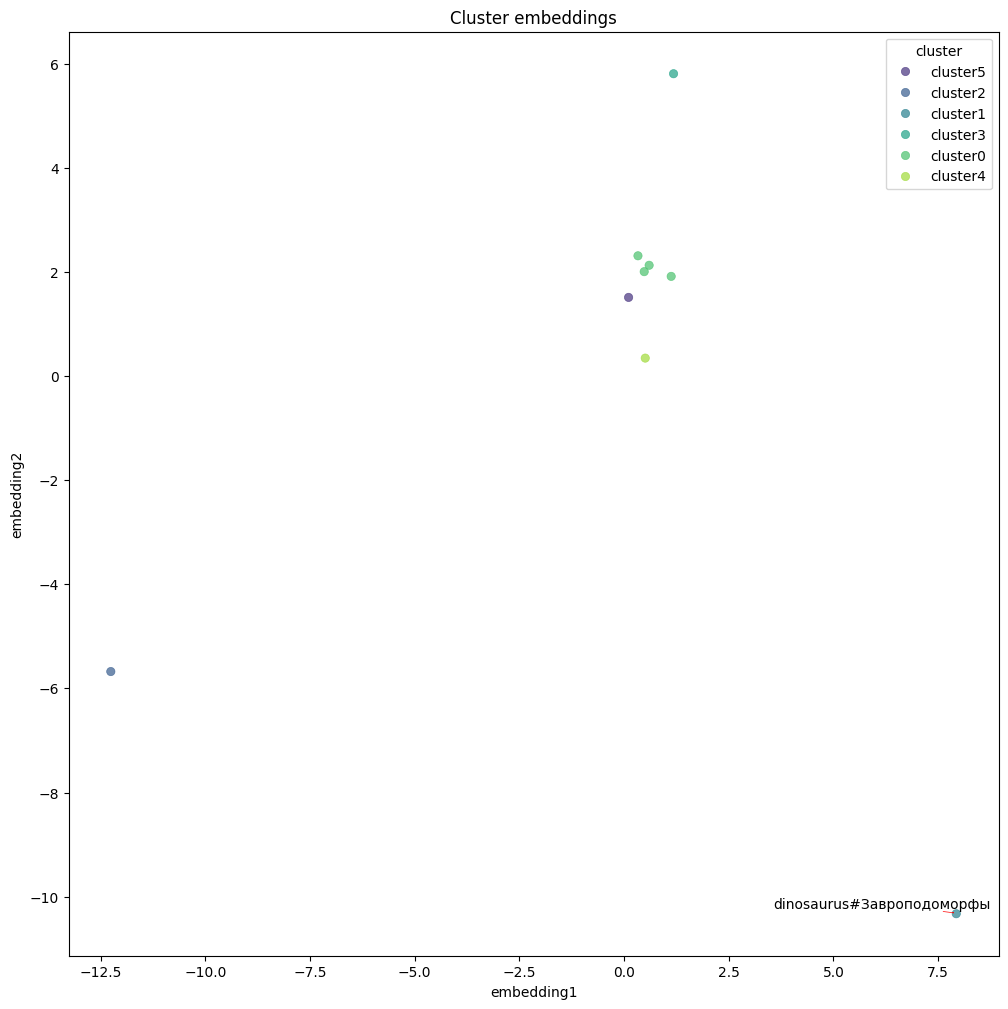

In [143]:
top20families = df["Семейство"].unique()[:20].tolist() 

# Проверим, что у нас не больше 20 семей
if len(top20families) > 20:
    top20families = top20families[:20]

print(top20families)

# Функция для отображения кластеров с выделением семейств
def plot_clusters(hue):
    np.random.seed(0)  
    plt.figure(figsize=(12, 12))  
    plt.title("{} embeddings".format(hue).capitalize())  

    # Создаем scatter plot с использованием seaborn
    ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue, palette="viridis", alpha=0.7, edgecolor=None)

    texts = []  
    limit = 0
    for i, point in plot_df.iterrows():
        if limit > 1000:  
            break
        if point["order"] in top20families:  # Проверяем, находится ли order в top20families
            texts.append(plt.text(point['embedding1'] + 0.02, point['embedding2'] + 0.01, str(point["order"])))

        limit += 1

    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', linewidth=0.5))  
    plt.show()  

# Вызов функции визуализации
plot_clusters('cluster')


Первая визуализация 2D-эмбеддингов показывает естественные географические кластеры, которые можно рассматривать как форму "истинной" картины:

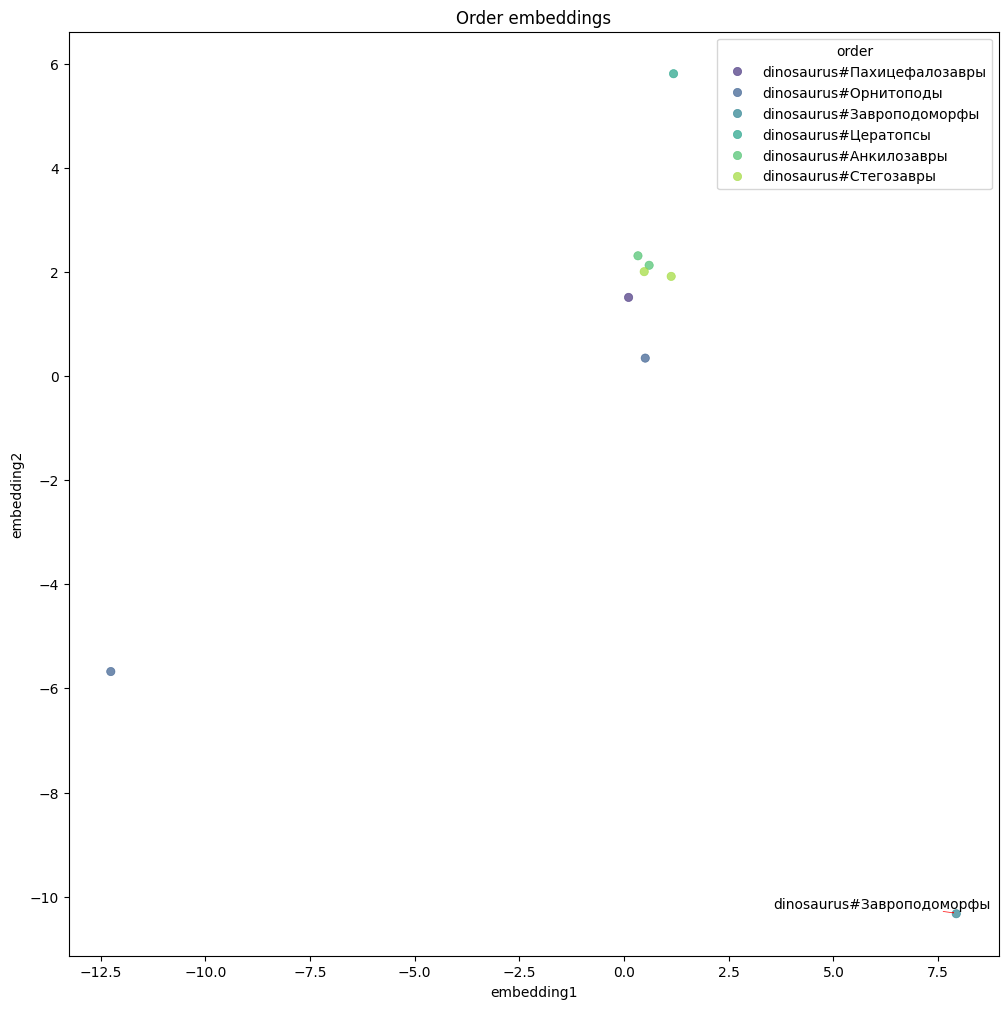

In [149]:
plot_clusters("order")

Видим, что эмбеддинги выявили географические сходства, даже несмотря на то, что эта информация не была явно указана в оригинальном наборе данных.

Отображаем те же 2D-эмбеддинги, но с кластерами, найденными с помощью K-Means:

Можно заметить, что K-Means обнаружил кластеры, очень похожие на естественные географические кластеры по континентам. Это показывает, что в 200-мерном пространстве эмбеддингов похожие команды располагаются близко друг к другу, что может быть выявлено алгоритмом кластеризации.

Наша оценка кластеров может быть более объективной с использованием метрики, такой как скорректированный индекс Рэнда, который варьируется от -1 до 1, где 0 означает случайное распределение меток, а 1 — идеальное совпадение.


In [150]:
from sklearn import metrics
metrics.adjusted_rand_score(plot_df.order, plot_df.cluster)

0.375

## Классификация

Используем эмбеддинги, чтобы предсказывать будущие матчи как задачу классификации.

Смоделируем её как многоклассовую задачу с тремя классами: победа домашней команды, поражение домашней команды, ничья.

Эмбеддинги используются непосредственно как признаки для классификатора XGBoost.

Сначала нам нужно определить целевую переменную:



In [157]:
# Получаем уникальные отряды из DataFrame и сохраняем их в список
dinos = list(df['Отряд'].unique())

# Создаем новый столбец 'results' в DataFrame
# Каждый отряд преобразуется в уникальный индекс
df["results"] = df['Отряд'].apply(lambda g: dinos.index(g)).astype(int)
print(df.results.value_counts(normalize=True))
# Проверяем результат
print(df[['Отряд', 'results']].head())


results
0     0.412371
2     0.237113
3     0.061856
4     0.061856
5     0.061856
6     0.061856
7     0.030928
9     0.030928
8     0.020619
1     0.010309
10    0.010309
Name: proportion, dtype: float64
                       Отряд  results
0        dinosaurus#Тероподы        0
1   dinosaurus#Пахецелозавры        1
2      dinosaurus#Орнитоподы        2
3  dinosaurus#Завроподоморфы        3
4       dinosaurus#Цератопсы        4


In [75]:
df.results.value_counts(normalize=True)

results
0    0.248202
3    0.191915
2    0.162273
4    0.142182
1    0.135521
5    0.088045
6    0.031862
Name: proportion, dtype: float64

### Оригинальный датасет

Устанавливаем xgboost

In [153]:
%pip install xgboost

     ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
     -------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
     ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:46
     ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:10
     ---------------------------------------- 0.5/124.9 MB 2.7 MB/s eta 0:00:47
     ---------------------------------------- 0.7/124.9 MB 2.9 MB/s eta 0:00:43
     ---------------------------------------- 0.7/124.9 MB 2.9 MB/s eta 0:00:44
     ---------------------------------------- 0.9/124.9 MB 2.8 MB/s eta 0:00:45
     ---------------------------------------- 1.0/124.9 MB 2.7 MB/s eta 0:00:46
     ---------------------------------------- 1.1/124.9 MB 2.8 MB/s eta 0:00:45
     ---------------------------------------- 1.1/124.9 MB 2.8 MB/s eta 0:00:45
     ---------------------------------------- 1.1/124.9 MB 2.8 MB/s eta 0:00:45
     ---------------------------------------- 1


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
new_df = df[["results", "train"]].copy()
new_df

,results,train
0,0,False
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
383,0,False
384,0,False
385,2,True
386,5,True


Применяем one hot кодирование


In [159]:
import pandas as pd
import re

# Заменяем все символы кроме букв на 'x' в "Динозавр"
df['Динозавр'] = df['Динозавр'].apply(lambda t: re.sub(r'[^a-zA-Zа-яА-Я_]', 'x', t) if isinstance(t, str) else t)

# Заменяем все символы кроме букв на 'x' в "Семейство"
df['Семейство'] = df['Семейство'].apply(lambda t: re.sub(r'[^a-zA-Zа-яА-Я_]', 'x', t) if isinstance(t, str) else t)

encoded_cols = pd.get_dummies(df[["Динозавр", "Отряд", "Семейство", "Эпоха", "Таз"]])

# Отображаем закодированные столбцы
encoded_cols


,Динозавр_dinosaurusxAcheroraptor,Динозавр_dinosaurusxAcheroxraptor,Динозавр_dinosaurusxAchexroxraptor,Динозавр_dinosaurusxAcrotholus,Динозавр_dinosaurusxAcrothoxlus,Динозавр_dinosaurusxAcroxthoxlus,Динозавр_dinosaurusxAcxrotholus,Динозавр_dinosaurusxAdelolophus,Динозавр_dinosaurusxAdelolopxhus,Динозавр_dinosaurusxAdelxolopxhus,...,Семейство_dinosaurusxТеризинозавриды,Семейство_dinosaurusxТесцелозавриды,Семейство_dinosaurusxТираннозавриды,Семейство_dinosaurusxЦератопсиды,Эпоха_dinosaurus#Верхний_мел,Эпоха_dinosaurus#Поздняя_юра,Эпоха_dinosaurus#Ранний_мел,Эпоха_dinosaurus#средняя_юра,Таз_dinosaurus#Птицетозовый,Таз_dinosaurus#Ящеротазовый
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
384,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [160]:
new_df = new_df.join(encoded_cols)

In [161]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df.columns.values]
new_df

,results,train,Динозавр_dinosaurusxAcheroraptor,Динозавр_dinosaurusxAcheroxraptor,Динозавр_dinosaurusxAchexroxraptor,Динозавр_dinosaurusxAcrotholus,Динозавр_dinosaurusxAcrothoxlus,Динозавр_dinosaurusxAcroxthoxlus,Динозавр_dinosaurusxAcxrotholus,Динозавр_dinosaurusxAdelolophus,...,Семейство_dinosaurusxТеризинозавриды,Семейство_dinosaurusxТесцелозавриды,Семейство_dinosaurusxТираннозавриды,Семейство_dinosaurusxЦератопсиды,Эпоха_dinosaurus#Верхний_мел,Эпоха_dinosaurus#Поздняя_юра,Эпоха_dinosaurus#Ранний_мел,Эпоха_dinosaurus#средняя_юра,Таз_dinosaurus#Птицетозовый,Таз_dinosaurus#Ящеротазовый
0,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,True,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,2,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
3,3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,4,True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
384,0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
385,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
386,5,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
